In [1]:
library(dplyr)
library(class)
library(tidyverse)
library(pROC)
library(glmnet)

#install.packages('glmnetUtils')
library(glmnetUtils)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ───────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ readr   1.3.1
✔ tibble  3.1.4     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ ggplot2 3.1.1     ✔ forcats 0.4.0
── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: Matrix

Attachin

In [4]:
pred <- readRDS("data/ATAC_predictions_train_20_predict_80/ATAC_pred_lasso_normalized_trimmed_formatted_standardized.rds")
#pred <- readRDS(snakemake@input[["input_predictions"]])

In [5]:
pred.pca <- prcomp(pred[2:10304], center = TRUE,scale. = TRUE)

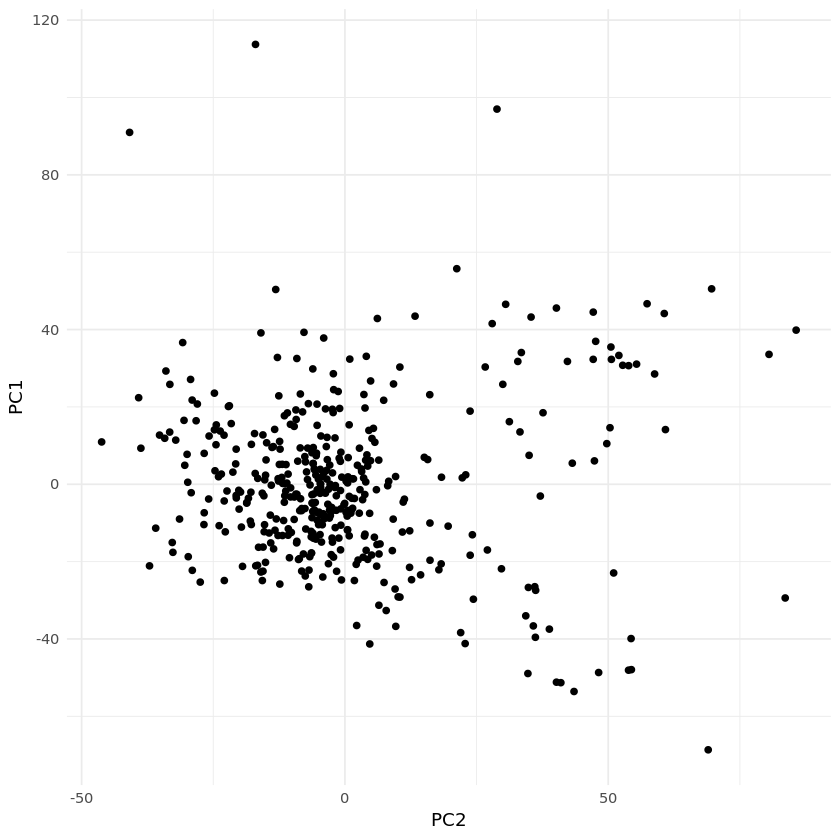

In [6]:
ggplot() +
  geom_point(aes(pred.pca$x[,1],pred.pca$x[,2])) +
  theme_minimal() +
  ylab('PC1') + xlab('PC2')

In [7]:
var_exp <- tibble(PC = 1:dim(pred.pca$x)[2], 
                  Variance_Explained = pred.pca$sdev^2 / sum(pred.pca$sdev^2),
                  Cumulative_Variance_Explained = cumsum(Variance_Explained))

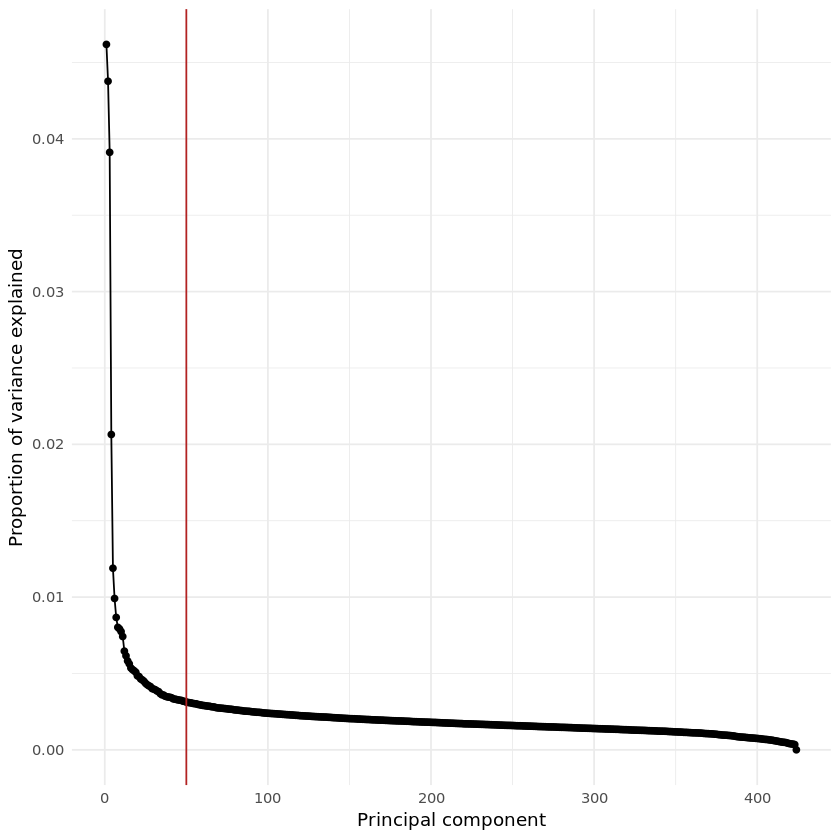

In [16]:
p <- ggplot(data = var_exp, aes(x = seq(1:dim(var_exp)[1]), y = Variance_Explained)) + 
  geom_point() + 
  geom_line() +
  xlab("Principal component") + 
  ylab("Proportion of variance explained") + 
  geom_vline(aes(xintercept = 50), color = "firebrick") + 
  theme_minimal()

print(p)

In [17]:
png("Plots_for_the_project_report/Scree_plot_PCA.png")
print(p)
dev.off()

png 
  2

In [8]:
sample_names <- as.data.frame(pred$sample)
colnames(sample_names) <- c("sample")
pca <- pred.pca$x[,1:50]
pca <- cbind(pca, sample_names)

In [ ]:
saveRDS(pca, snakemake@output[["output_pca"]])